# Simple Linear Regression 

## Objectives
* Use sci-kit learn to implement simple Linear Regression
* Create a model, train it and test it and use the model

### Importing needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


Downloading and reading the data 

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration 

In [5]:
print(f"Dataframe has {df.shape[0]} number of rows and {df.shape[1]} columns")

Dataframe has 1067 number of rows and 13 columns


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Select some features to explore more 

In [6]:
car_df = cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
car_df.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


We can plot each of these features:

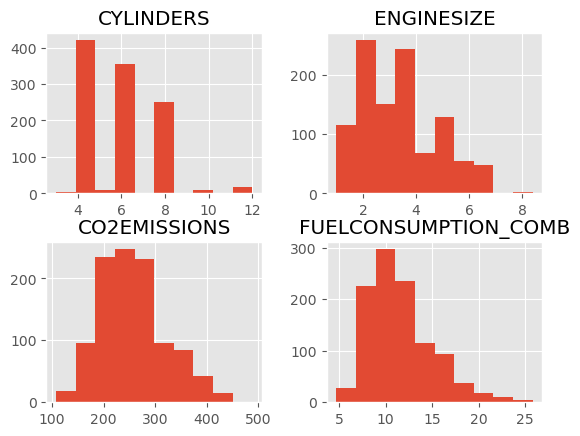

In [7]:
viz = car_df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

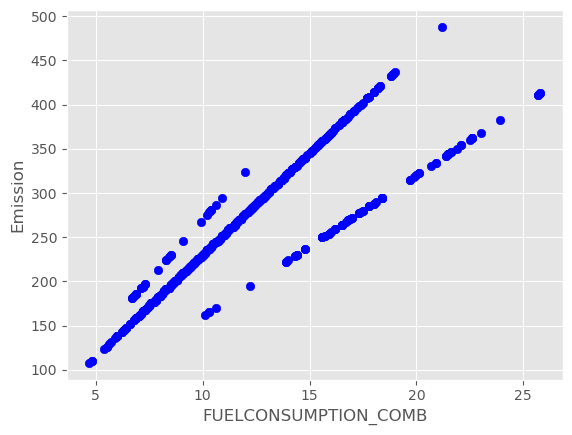

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

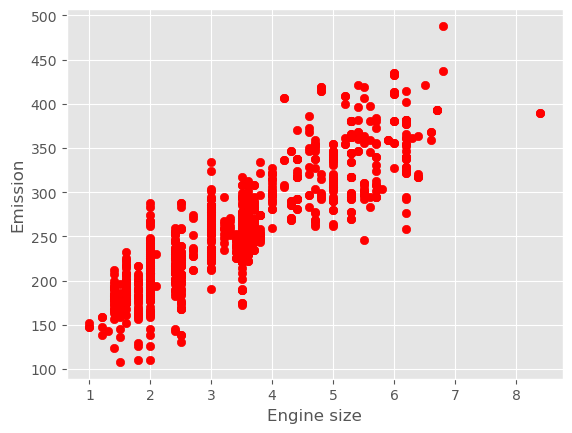

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

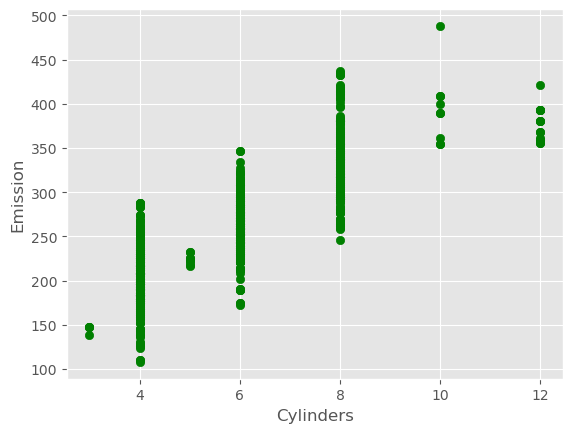

In [10]:
plt.scatter(car_df.CYLINDERS, car_df.CO2EMISSIONS, color= 'green')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.


In [20]:
#feature matrix
X = car_df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
# target vector
y = car_df[['CO2EMISSIONS']]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train dataset: ", X_train.shape, y_train.shape)
print("Test dataset :", X_test.shape, y_test.shape)

Train dataset:  (853, 3) (853,)
Test dataset : (214, 3) (214,)


### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

#### Train data distribution

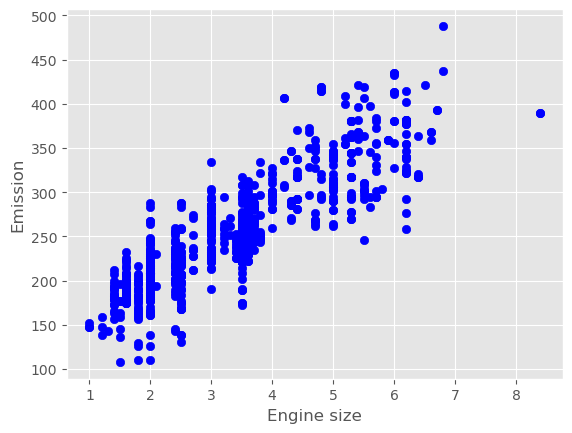

In [21]:
plt.scatter(X_train.ENGINESIZE, y_train,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data

In [22]:
#Linear relation between Enginesize and emissions 
X_train_Eng = X_train[['ENGINESIZE']]

In [23]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train_Eng,y_train)
# the coefficient and intercept
print('Coefficient: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficient:  [39.116937]
Intercept:  125.14677575630918


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.

#### Plot outputs :

We can plot the fit line over the data

Text(0, 0.5, 'Emission')

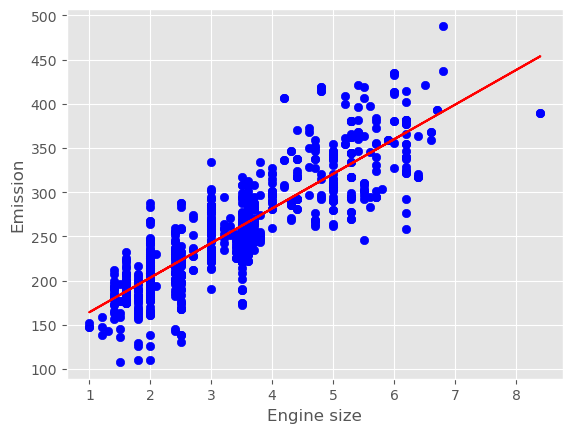

In [24]:
plt.scatter(X_train_Eng, y_train, color='blue')
plt.plot(X_train_Eng, regr.coef_[0]*X_train_Eng+ regr.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')


#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [25]:
from sklearn.metrics import r2_score
X_test_Eng = X_test[['ENGINESIZE']]
# estimate
y_hat = regr.predict(X_test_Eng)
y_hat [:5]

array([269.87944265, 203.38064975, 262.05605525, 262.05605525,
       297.26129854])

In [28]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_hat) )

Mean absolute error: 19.98
Residual sum of squares (MSE): 687.19
R2-score: 0.81


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe

In [29]:
X_train = X_train[['FUELCONSUMPTION_COMB']]
X_test = X_test[['FUELCONSUMPTION_COMB']]

In [30]:
# training LR model
regr = LinearRegression()
regr.fit(X_train, y_train)

y_predict = regr.predict(X_test)


In [31]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predict-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predict - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_predict) )

Mean absolute error: 19.63
Residual sum of squares (MSE): 717.13
R2-score: 0.81
